In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [170]:
fn_lfc = '../../data/standardized_data/result_logfc_matrix_2021_10_22_BASIS.csv'
fn_qval = '../../data/standardized_data/result_qval_matrix_2021_10_22_BASIS.csv'
fn_bin = '../../data/standardized_data/result_bin_matrix_2021_10_22_BASIS.csv'

df_lfc = pd.read_csv(fn_lfc)
df_qval = pd.read_csv(fn_qval)
df_bin = pd.read_csv(fn_bin)

df_lfc.head(2)

,Rv_ID,PE35_KO_vs_mbio_H37Rv,PPE68_KO_vs_mbio_H37Rv,Rv0950c_KO_vs_CB_WT,Rv0954_KO_vs_RJ_WT,Rv1096_KO_vs_CB_WT,Rv3005c_KO_day32_vs_dejesus_H37Rv_day32,Rv3594_KO_vs_Rubin_FLUTE_WT,Rv3684_KO_vs_CB_WT,Rv3717_KO_vs_Rubin_FLUTE_WT,...,Cast.EiJ_vs_C57BL.6J,IFNG_vs_C57BL.6J,NOD.ShiLtJ_vs_C57BL.6J,NOS_vs_C57BL.6J,NZO.H1LtJ_vs_C57BL.6J,PWK.PhJ_vs_C57BL.6J,Phox_vs_C57BL.6J,Rag_vs_C57BL.6J,Wsb.Eij_vs_C57BL.6J,in_vitro_vs_C57BL.6J
0,Rv0001,-0.41,0.01,0.0,0.0,0.0,3.12,-0.06,0.0,-0.06,...,0.0,0.0,0.0,0.0,0.0,0.22,0.0,0.0,0.00,0.0
1,Rv0002,3.28,2.38,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.27,0.0


### Single gene analysis:

In [247]:
rvid = 'Rv2278'
df_lfc[df_lfc.Rv_ID==rvid].values[0][1:14]

array([-0.12, -0.23, 0.2, -0.21, 0.16, -1.04, -0.04, -0.01, -0.2, -0.25,
       0.19, 0.04, -0.14], dtype=object)

In [248]:
df_qval[df_qval.Rv_ID==rvid].values[0][1:14]

array([1.0, 1.0, 1.0, 1.0, 1.0, 0.59058, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0], dtype=object)

In [249]:
df_bin[df_bin.Rv_ID==rvid].values[0][1:]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [250]:
[col for col in df_bin.columns[1:] if df_bin[df_bin.Rv_ID==rvid][col].values[0] == 1]

[]

### multiple gene analysis:

In [184]:
fn = '../../data/tests/df_clus_y.csv'
df_class = pd.read_csv(fn)

In [185]:
clus = 'cluster_15'
list_rvid = df_class[df_class[clus]==1].Rv_ID.tolist()
len(list_rvid)

49

In [187]:
list_ess_all = []
# rvid = list_rvid[0]
for rvid in list_rvid:
    list_ess = [col for col in df_bin.columns[1:] if df_bin[df_bin.Rv_ID==rvid][col].values[0] == 1]
    list_ess_all.append(list_ess)
df_ess = pd.DataFrame()
df_ess['Rv_ID'] = list_rvid
df_ess['essential'] = [' '.join(list_ess) for list_ess in list_ess_all]

In [188]:
file_mbio = '../../data/SI_datasets/2017A_DeJesus_Iorger/table_1.xlsx'
df_mbio = pd.read_excel(file_mbio)
df_mbio = df_mbio[['Rv_ID', 'Final Call']]

In [189]:
df_ess = df_ess.merge(df_mbio, on = 'Rv_ID', how = 'left')

In [190]:
df_ess.shape

(49, 3)

In [191]:
df_ess[df_ess['Final Call']=='ES'].shape

(25, 3)

In [192]:
df_ess[df_ess['Final Call']=='ES'].essential.value_counts()

                                                                                                                                       24
carey_621_vs_carey_rv carey_631_vs_carey_rv carey_632_vs_carey_rv carey_641_vs_carey_rv carey_662_vs_carey_rv carey_667_vs_carey_rv     1
Name: essential, dtype: int64

In [194]:
df_ess[df_ess['Final Call']=='ES'].head()

,Rv_ID,essential,Final Call
0,Rv1536,,ES
1,Rv1014c,,ES
2,Rv0041,,ES
4,Rv2555c,,ES
6,Rv3580c,,ES


# FIXED THIS

#### Here is the inconsistency: the MtbTnDB app says q-value = 0.7

In [195]:
rvid = 'Rv1536'
col = 'kieser_dPonA1_vs_mbio_H37Rv'
df_lfc[df_lfc.Rv_ID==rvid][col]

1579    2.81
Name: kieser_dPonA1_vs_mbio_H37Rv, dtype: float64

In [196]:
df_qval[df_qval.Rv_ID==rvid][col]

1579    0.69775
Name: kieser_dPonA1_vs_mbio_H37Rv, dtype: float64

In [197]:
fn_qval_old = '../../data/standardized_data/result_qval_matrix_2020_08_27.csv'
df_qval_old = pd.read_csv(fn_qval_old)
df_qval_old[df_qval_old.Rv_ID==rvid][col]

1579    0.69775
Name: kieser_dPonA1_vs_mbio_H37Rv, dtype: float64

In [198]:
# fn_qval_test = '../../data/standardized_data/result_qval_matrix_2021_08_27.csv'
# df_qval_test = pd.read_csv(fn_qval_test)
# df_qval_test[df_qval_test.Rv_ID==rvid][col]

1579    0.0347
Name: kieser_dPonA1_vs_mbio_H37Rv, dtype: float64

## Systematically find all the differences: 

In [199]:
fn_qval_old = '../../data/standardized_data/result_qval_matrix_2020_08_27.csv'
df_qval_old = pd.read_csv(fn_qval_old)
df_qval_old.dropna(axis=0, inplace=True)

fn_qval_basis = '../../data/standardized_data/result_qval_matrix_2021_10_22_BASIS.csv'

df_qval_basis = pd.read_csv(fn_qval_basis)
df_qval_basis.rename(columns={'Unnamed: 0':'Rv_ID'}, inplace=True)
df_qval_basis.dropna(axis=0, inplace=True)

print(df_qval_old.shape, df_qval_basis.shape)
# are the rvid rows the same? 
print(df_qval_old.Rv_ID.tolist() == df_qval_basis.Rv_ID.tolist())

(3971, 65) (3971, 126)
True


In [200]:
fn_lfc_old = '../../data/standardized_data/result_logfc_matrix_2020_08_27.csv'
df_lfc_old = pd.read_csv(fn_lfc_old)
df_lfc_old.dropna(axis=0, inplace=True)

fn_lfc_basis = '../../data/standardized_data/result_logfc_matrix_2021_10_22_BASIS.csv'

df_lfc_basis = pd.read_csv(fn_lfc_basis)
df_lfc_basis.dropna(axis=0, inplace=True)

print(df_lfc_old.shape, df_lfc_basis.shape)
# are the rvid rows the same? 
print(df_lfc_old.Rv_ID.tolist() == df_lfc_basis.Rv_ID.tolist())

(3971, 65) (3971, 126)
True


In [201]:
cols = [col for col in df_qval_basis.columns if col in df_qval_old.columns]
df_qval_basis = df_qval_basis[cols].copy()

cols = [col for col in df_lfc_basis.columns if col in df_lfc_old.columns]
df_lfc_basis = df_lfc_basis[cols].copy()

print(df_qval_basis.shape, df_lfc_basis.shape)

(3971, 65) (3971, 65)


#### Where do the old and new lfc and qval dataframes differ? 

In [202]:
cols_data = df_qval_old.columns[1:]
mat_qval_diff = np.abs(df_qval_basis[cols_data].values - df_qval_old[cols_data].values)

In [203]:
cols_data = df_lfc_old.columns[1:]
mat_lfc_diff = np.abs(df_lfc_basis[cols_data].values - df_lfc_old[cols_data].values)

there are many differences in the q-values: 

In [204]:
mat_qval_diff.max(0)

array([1.11022302e-16, 0.00000000e+00, 0.00000000e+00, 1.11022302e-16,
       0.00000000e+00, 1.11022302e-16, 1.11022302e-16, 0.00000000e+00,
       1.11022302e-16, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       0.00000000e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
       1.11022302e-16, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
       1.11022302e-16, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       0.00000000e+00, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
       1.11022302e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.11022302e-16, 1.11022302e-16, 0.00000000e+00, 1.11022302e-16,
       1.11022302e-16, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.11022302e-16, 1.11022302e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

There are no differences in the log2FC values: 

In [205]:
mat_lfc_diff.max(0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

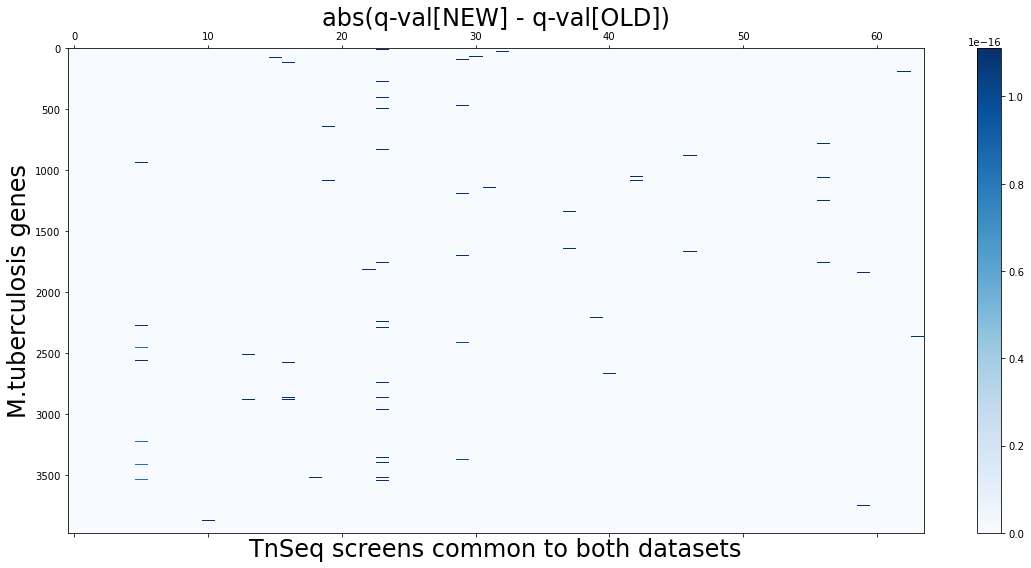

In [206]:
fig, ax = plt.subplots(figsize = (16, 8))
shw = ax.matshow(mat_qval_diff, aspect='auto', cmap=plt.cm.Blues)
plt.colorbar(shw)
plt.title('abs(q-val[NEW] - q-val[OLD])', fontsize=24)
xl = plt.xlabel('TnSeq screens common to both datasets', fontsize = 24)
xl = plt.ylabel('M.tuberculosis genes', fontsize = 24)
plt.tight_layout()

### Digging deeper into the data for all the in-vitro essentials: 

In [207]:
df_mbio[df_mbio.Rv_ID.str.contains('Rv293')]

,Rv_ID,Final Call
3003,Rv2930,NE
3004,Rv2931,NE
3005,Rv2932,NE
3006,Rv2933,NE
3007,Rv2934,NE
3008,Rv2935,NE
3009,Rv2936,GA
3010,Rv2937,GA
3011,Rv2938,GA
3012,Rv2939,NE


In [211]:
# all the in-vitro essentials: 
list_ES = df_mbio[df_mbio['Final Call']=='ES'].Rv_ID.tolist()
len(list_ES)

461

In [209]:
list_col_ess_all = []
for rvid in list_ES:
    list_col_ess = [col for col in df_bin.columns[1:] if df_bin[df_bin.Rv_ID==rvid][col].values[0] == 1]
    list_col_ess_all.append(list_col_ess)
df_col_ess = pd.DataFrame()
df_col_ess['Rv_ID'] = list_ES
df_col_ess['essential'] = [' | '.join(list_col_ess) for list_col_ess in list_col_ess_all]

In [212]:
df_col_ess.shape

(461, 2)

Where are we getting significant l2fc's for the in vitro essentials? 

In [210]:
df_col_ess.essential.value_counts().to_frame().head(20)

,essential
,362
minato_minimal_plate_vs_minato_rich_plate,20
carey_621_vs_carey_rv | carey_631_vs_carey_rv | carey_632_vs_carey_rv | carey_641_vs_carey_rv | carey_662_vs_carey_rv | carey_667_vs_carey_rv,11
kieser_dPonA1_vs_mbio_H37Rv,7
carey_621_vs_carey_rv | carey_631_vs_carey_rv | carey_632_vs_carey_rv | carey_641_vs_carey_rv | carey_662_vs_carey_rv | carey_663_vs_carey_rv | carey_667_vs_carey_rv,6
carey_621_vs_carey_rv | carey_630_vs_carey_rv | carey_631_vs_carey_rv | carey_632_vs_carey_rv | carey_641_vs_carey_rv | carey_662_vs_carey_rv | carey_663_vs_carey_rv | carey_667_vs_carey_rv,5
marP_KO_vs_marP_WT,3
minato_minimal_plate_vs_minato_rich_plate | zhang_wt_mouse_d10_vs_zhang_input_library | zhang_wt_mouse_d45_vs_zhang_input_library,3
carey_621_vs_carey_rv | carey_631_vs_carey_rv | carey_641_vs_carey_rv | carey_662_vs_carey_rv | carey_667_vs_carey_rv,2
carey_621_vs_carey_rv | carey_630_vs_carey_rv | carey_631_vs_carey_rv | carey_632_vs_carey_rv | carey_641_vs_carey_rv | carey_662_vs_carey_rv | carey_663_vs_carey_rv | carey_667_vs_carey_rv | kieser_dPonA1_vs_mbio_H37Rv,2


In [219]:
df_col_ess[df_col_ess.essential.str.contains('kieser_dPonA1_vs_mbio_H37Rv')]

,Rv_ID,essential
77,Rv0667,kieser_dPonA1_vs_mbio_H37Rv
136,Rv1122,carey_621_vs_carey_rv | carey_630_vs_carey_rv ...
138,Rv1166,kieser_dPonA1_vs_mbio_H37Rv
215,Rv1630,kieser_dPonA1_vs_mbio_H37Rv
290,Rv2509,kieser_dPonA1_vs_mbio_H37Rv
329,Rv2846c,kieser_dPonA1_vs_mbio_H37Rv
375,Rv3246c,carey_621_vs_carey_rv | carey_630_vs_carey_rv ...
389,Rv3302c,carey_621_vs_carey_rv | carey_630_vs_carey_rv ...
404,Rv3460c,kieser_dPonA1_vs_mbio_H37Rv
443,Rv3801c,kieser_dPonA1_vs_mbio_H37Rv


In [218]:
df_col_ess[df_col_ess.essential.str.contains('minato')].shape

(38, 2)

In [217]:
df_col_ess[df_col_ess.essential.str.contains('carey')].shape

(59, 2)

In [89]:
df_col_ess[df_col_ess.essential.str.contains('minato_minimal_plate_vs_minato_rich_plate')].Rv_ID.tolist()

['Rv0013',
 'Rv0102',
 'Rv0189c',
 'Rv0337c',
 'Rv0338c',
 'Rv0363c',
 'Rv0510',
 'Rv0772',
 'Rv0780',
 'Rv0788',
 'Rv0803',
 'Rv0808',
 'Rv0809',
 'Rv0956',
 'Rv1005c',
 'Rv1122',
 'Rv1133c',
 'Rv1208',
 'Rv1409',
 'Rv1415',
 'Rv1464',
 'Rv1559',
 'Rv1595',
 'Rv1609',
 'Rv1612',
 'Rv1613',
 'Rv1636',
 'Rv1708',
 'Rv1826',
 'Rv1832',
 'Rv2109c',
 'Rv2186c',
 'Rv2192c',
 'Rv2210c',
 'Rv2211c',
 'Rv2225',
 'Rv2439c',
 'Rv2477c',
 'Rv2747',
 'Rv2995c',
 'Rv3003c',
 'Rv3031',
 'Rv3039c',
 'Rv3341',
 'Rv3579c',
 'Rv3601c',
 'Rv3602c',
 'Rv3710',
 'Rv3838c',
 'Rv3859c']